In [1]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
from IPython import display

In [2]:
import math
from random import random
import numpy as np
import pynn as nn
import matplotlib.pyplot as plt

In [3]:
node = nn.MatrixProduct(1, 1)

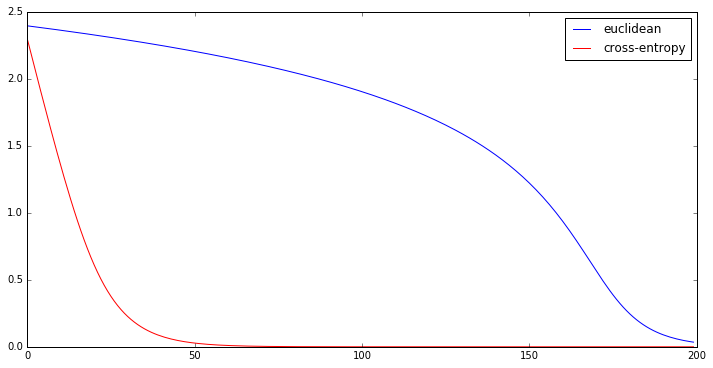

In [4]:
points = [[],[]]

for j in range(2):
    node.weight[0] = 2.4
    for i in range(200):
        state = node.newState()
        vins = [np.array([1])]

        # feedforward
        vouts = node.transmit(state, vins)

        vres = np.array([0])
        if j == 0:
            verrs = [(np.tanh(vouts[0]) - vres)/(np.cosh(vouts[0])**2)]
        else:
            verrs = [(np.tanh(vouts[0]) - vres)]
        cost = np.sum((verrs[0])**2)

        # backpropagate
        error = node.newError()
        grad = node.newGradient()
        node.backprop(grad, error, state, verrs)
        node.learn(grad, 1e-1)

        points[j].append(node.weight[0][0])
    
plt.plot(points[0], color='b', label='euclidean')
plt.plot(points[1], color='r', label='cross-entropy')
plt.legend()

plt.show()